# Policy Iteration

**Algorithm**
\
**Input**: $\theta$ > 0 tolerance param, $\gamma$ discount factor
\
Initialize $V(s)$ and $\pi(s|a)$ arbitrarily
\
\
**while** policy-stable == False ***do*** 
\
$\;\;\;\;\;\;$ *Policy Evaluation:*
\
$\;\;\;\;\;\;$ **while** $\triangle > \theta$ do
\
$\;\;\;\;\;\; \;\;\;\;\;\;$ $ \triangle \leftarrow 0$
\
$\;\;\;\;\;\; \;\;\;\;\;\;$ **for** $s \in S$ do
\
$\;\;\;\;\;\; \;\;\;\;\;\; \;\;\;\;\;\;$  $v \leftarrow V(s)$
\
$\;\;\;\;\;\; \;\;\;\;\;\; \;\;\;\;\;\;$ $V(s) \leftarrow \sum_{a}\pi(a|s)\sum_{s',r}p(s',r)[r+\gamma(s')]$
\
$\;\;\;\;\;\; \;\;\;\;\;\; \;\;\;\;\;\;$ $\triangle \leftarrow max(\triangle, |v-V(s)])$
\
$\;\;\;\;\;\; \;\;\;\;\;\;$ **end for**
\
$\;\;\;\;\;\; \;\;\;\;\;\;$ **end while**
\
\
$\;\;\;\;\;\;$ *Policy Improvement:*
\
$\;\;\;\;\;\;$ policy-stable == True
\
$\;\;\;\;\;\;$ **for** $s \in S$ do
\
$\;\;\;\;\;\; \;\;\;\;\;\;$ old-action $\leftarrow \pi(s)$
\
$\;\;\;\;\;\; \;\;\;\;\;\;$ $\pi(s) \leftarrow argmax_{a \in A(s)} \sum_{s',r}p(s',r|s,a)[r+\gamma V(s')]$
\
$\;\;\;\;\;\; \;\;\;\;\;\;$**if** old-action $\not= \pi(s)$ **then**
\
$\;\;\;\;\;\; \;\;\;\;\;\; \;\;\;\;\;\;$ policy-stable $\leftarrow$ FALSE
\
$\;\;\;\;\;\; \;\;\;\;\;\;$ **end if**
\
$\;\;\;\;\;\;$ **end for**
\
\
 **end while**
\
**Output:** Optimal policy $\pi(a|s)$ and state values $V(s)$






In [1]:
# import 
import gym
import numpy as np 
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

In [2]:
# initialize environment
env = Maze()
env.reset()

(0, 0)

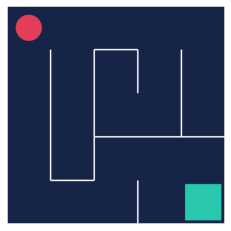

In [3]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)
env.close()


In [5]:
# define policy
# create the policy
policy_probs = np.full((5, 5, 4),0.25)

In [8]:
# random distribution policy
def policy(states):
    return policy_probs[states]

In [9]:
# test action probabilities
action_probs = policy((0, 0))

for action, prob in zip(range(4), action_probs):
    print(f'Probability of taking action {action}: {prob}')

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


In [ ]:
# test using random policy
# it might take a while to complete
env.reset()
test_agent(env, policy, episodes=1)

env.close()


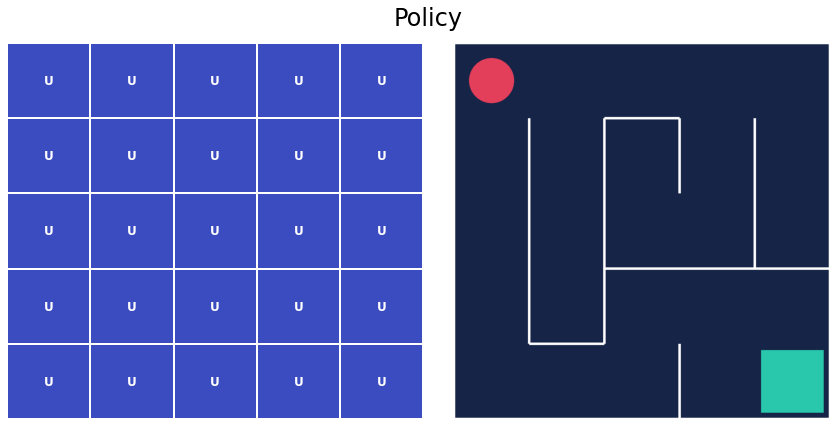

In [11]:
# plot the policy
plot_policy(policy_probs, frame)

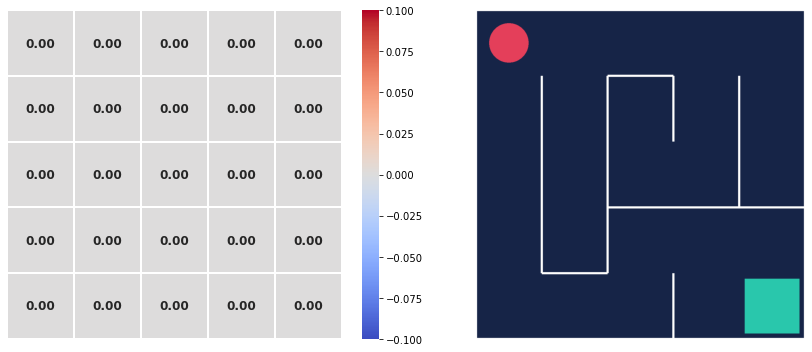

In [12]:
# plot values
state_values = np.zeros((5,5))
plot_values(state_values, frame)

### Implement Privacy Iteration
**Bellman Equation**

$$v_{\pi}(s) = \sum \limits_{a}\pi(s|a) \sum \limits_{s',r} P(s',r) [r+\gamma v_{\pi}(s')]$$